In [72]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [73]:
from math import exp
# define a gaussian kernel function
def GaussianKernel(v1, v2, sigma):
    return exp(-norm(v1-v2, 2)**2/(2.*sigma**2))

# this is a simple kernel function
def simpleKernel(n1,n2,sigma):
    difference = float(n1) - float(n2)
    difference = pow(difference,2)
    difference = (-1.0*difference)/ (sigma**2)
    return exp(difference)

In [74]:
# implement simple mean shift
import numpy as np
# random pick a point
from random import randrange

# Generate dataset
# keep the dataset the same
mu, sigma = 10, 3 # mean and standard deviation
dataset = np.random.normal(mu, sigma, 1000)
mu, sigma = 20, 3 # mean and standard deviation
dataset = np.array(list(dataset) + list(np.random.normal(mu,sigma,1000)))
mu, sigma = 30, 3
dataset = np.array(list(dataset) + list(np.random.normal(mu,sigma,1000)))
print "data set done"

data set done


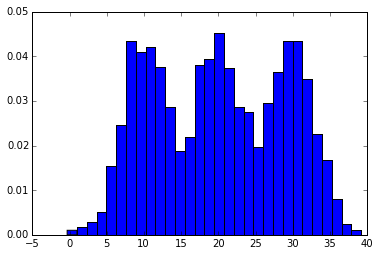

In [75]:
# graph the previous dataset
import matplotlib.pyplot as plt
#do not sort the data here
#s.sort()
count, bins, ignored = plt.hist(dataset, 30, normed=True)
for result in result_list:
    plt.axvline(result, color='b', linestyle='dashed', linewidth=1)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [76]:
from scipy.spatial import distance

# this function is to calculate the k nearest neighbor
def K_Nearest_Neighbor(current, k, data):
    return_list = []
    index = 0
    distanceList = []
    for x in data:
        distanceList.append((distance.euclidean(current, x), x))
    distanceList.sort()
    #get the k nearest label
    for i in range (0, k):
        #append the first k smallest element
        return_list.append(distanceList[i][1])
    return return_list

In [82]:
import copy
def distance_calculate(estimate, current):
    return (abs(estimate-current),current)

window_size = 10
result_list = []
# run experiments
for experiment in range(0, 100):
    np.random.shuffle(dataset)
    estimate = dataset[0]
    #print "estimate is ", estimate
    window = []
    for i in range(1, 11):
        window.append(distance_calculate(estimate, dataset[i]))
    window.sort()

    #print "new estimate is ", sum(n for _, n in window) / len(window)
    #for i in range(10, len(dataset)):
    count = 0
    for i in range(11, len(dataset)):
        current = dataset[i]
        current_distance = distance_calculate(estimate, current)
        #if the distance is samller than the window's last element, update the window
        if current_distance[0] < window[len(window)-1][0]:
            # remove the last element
            window.pop()
            window.append(current_distance)
        estimate = sum(n for _, n in window) / len(window)
        # print "new estimate is ", estimate
        window_copy = copy.deepcopy(window)
        window = []
        for i in range(0, 10):
            window.append(distance_calculate(estimate, window_copy[i][1]))
        window.sort()
#         if count == 10:
#             count = 0
#             estimate = sum(n for _, n in window) / len(window)
#             # print "new estimate is ", estimate
#             window_copy = copy.deepcopy(window)
#             window = []
#             for i in range(0, 10):
#                 window.append(distance_calculate(estimate, window_copy[i][1]))
#             window.sort()
#         count = count + 1
    print "final estimate is ", estimate
    result_list.append(estimate)
    #print "final window is ", window

final estimate is  8.22689907018
final estimate is  10.0072482272
final estimate is  21.6158000957
final estimate is  14.0723526185
final estimate is  30.1193396519
final estimate is  28.8681772855
final estimate is  30.4119192202
final estimate is  30.4173985143
final estimate is  21.6158000957
final estimate is  29.1552693218
final estimate is  13.313366207
final estimate is  18.450316618
final estimate is  20.2664317397
final estimate is  10.7870255274
final estimate is  29.1799570042
final estimate is  30.9307324746
final estimate is  12.5567367228
final estimate is  21.3282602723
final estimate is  32.0349656977
final estimate is  19.8382596715
final estimate is  8.49745539804
final estimate is  11.2979580604
final estimate is  8.05097566181
final estimate is  20.0677114993
final estimate is  26.7028845414
final estimate is  18.0110689237
final estimate is  18.4356352893
final estimate is  8.7330507951
final estimate is  29.1799570042
final estimate is  17.2539249421
final estimat

In [83]:
from sklearn.cluster import KMeans
import numpy as np
km = KMeans(n_clusters=3)
#change result list to column major
result_list = np.array(result_list)
km.fit(result_list.reshape(-1,1))  # -1 will be calculated to be 13876 here
print km.cluster_centers_

[[ 10.54388806]
 [ 20.16592721]
 [ 29.52550125]]


In [68]:
mean = (10,20)
cov = [[1,0],[0,1]]
dataset = np.random.multivariate_normal(mean,cov,100)
#print x

In [69]:
import numpy
def distance_calculate(estimate, current):
    return (numpy.linalg.norm(estimate-current), current)

window_size = 10
result_list = []
# run experiments
for experiment in range(0, 100):
    np.random.shuffle(dataset)
    estimate = dataset[0]
    #print "estimate is ", estimate
    window = []
    for i in range(1, 11):
        window.append(distance_calculate(estimate, dataset[i]))
    window.sort()

    #print "new estimate is ", sum(n for _, n in window) / len(window)
    #for i in range(10, len(dataset)):
    for i in range(11, len(dataset)):
        current = dataset[i]
        current_distance = distance_calculate(estimate, current)
        #if the distance is samller than the window's last element, update the window
        if current_distance[0] < window[len(window)-1][0]:
            # remove the last element
            window.pop()
            window.append(current_distance)
        estimate = sum(n for _, n in window) / len(window)
        # print "new estimate is ", estimate
        window_copy = copy.deepcopy(window)
        window = []
        for i in range(0, 10):
            window.append(distance_calculate(estimate, window_copy[i][1]))
        window.sort()
    print "final estimate is ", estimate
    result_list.append(estimate)
    #print "final window is ", window

final estimate is  [  9.55627984  20.41860119]
final estimate is  [  9.75416187  20.19657632]
final estimate is  [ 10.20604076  19.05313338]
final estimate is  [ 10.95426477  18.98194814]
final estimate is  [  9.76458051  20.10426074]
final estimate is  [  9.72558016  20.28224396]
final estimate is  [ 10.90402796  20.77477493]
final estimate is  [ 10.07270184  19.65537579]
final estimate is  [  9.54439     20.50044854]
final estimate is  [  9.50444532  20.83992944]
final estimate is  [  9.9012361   19.70900312]
final estimate is  [  9.53988353  20.67972938]
final estimate is  [  9.82695967  20.1454166 ]
final estimate is  [  9.46824269  20.92106456]
final estimate is  [  9.72997035  19.30532393]
final estimate is  [  9.8292643   19.66045952]
final estimate is  [  9.62878291  20.75101583]
final estimate is  [ 10.2045821   19.33422788]
final estimate is  [  9.63587496  19.68856289]
final estimate is  [ 10.86270546  20.72030091]
final estimate is  [  9.71329519  19.71249351]
final estimat